In [116]:
#dilation example(genişletme)

In [117]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [118]:
list_1=[0,0,1,1,0]
list_2=[1,1,1,1,1]
image_OR=list_1[0] or list_2[0]
image_OR

1

In [119]:
list_1=[0,0,1,1,0]
list_2=[1,1,1,1,1]
image_AND=list_1[0] and list_2[0]
image_AND

0

In [120]:
list_1=[0,0,1]
list_2=[1,1,1]
image_AND_2=(list_1[0] and list_2[0]) and (list_1[1] and list_2[1]) and (list_1[2] and list_2[2])
#yukarıdaki-> 1 olması için hepsinin 1 olmasını ister.
image_AND_2

0

In [121]:
list_1=[0,0,1,0,1]
list_2=[1,1,1,1,1]
image_OR_2=(list_1[0] and list_2[0]) or (list_1[1] and list_2[1]) or (list_1[2] and list_2[2])
#yukarıdaki-> 1 olması için iki tane karşılıklı elemanın 1 olması yeterli.
image_OR_2

1

In [122]:
def my_f_0_and(l1,l2):
    n=len(l1)
    s=[]
    for i in range(n):
        a=l1[i] and l2[i]
        s.append(a)
    return s    
def my_f_1_and(l1):
    if 0 in l1:#kendi içerisinde and yaptık
        s1=0
    else:
        s1=1
    return s1    

In [123]:
list_1=[0,0,1,0,1]
list_2=[1,1,1,1,1]
a=my_f_0_and(list_1,list_2)
my_f_1_and(a)#bu şuan hepsinin 1 olmasını ölçüyor.

0

In [124]:
#yukardakileri birleştirdik.
def my_f_0_and(l1,l2):
    n=len(l1)
    s=[]
    for i in range(n):
        a=l1[i] and l2[i]
        s.append(a)
    return s    
def my_f_1_AND_or_OR(l1,operator=0):#operator 1 ise sadece 1 tane 1 olması yeterli.
    if operator:
        if 1 in l1:
            s1=1
        else:
            s1=0
    else:
        if 0 in l1:
            s1=0
        else:
            s1=1
    return s1 
def my_f_2_combine(l1,l2,op=0):
    a=my_f_0_and(l1,l2)
    return my_f_1_AND_or_OR(a,op)
    

In [125]:
list_1=[1,1,1,1,1]#mask
list_2=[1,1,1,1,1]#block
my_f_2_combine(list_1,list_2,1)#1=or,0=and

1

In [126]:
def convert_RGB_to_monochrome_BW(image_1,threshold=100):
    img_1=image_1               #plt.imread(image_1)
    img_2=np.zeros((img_1.shape[0],img_1.shape[1]))
    for i in range(img_2.shape[0]):
        for j in range(img_2.shape[1]):
            if(img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,1]/3)>threshold:
                img_2[i,j]=0
            else:
                img_2[i,j]=1
    return img_2            


<function matplotlib.pyplot.show(*args, **kw)>

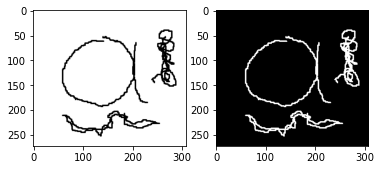

In [127]:
path_file =r"C:\Users\hbcic\Adsiz_1.png"
img_1=plt.imread(path_file)

img_2=convert_RGB_to_monochrome_BW(img_1,0.5)

plt.subplot(1,2,1),plt.imshow(img_1)
plt.subplot(1,2,2),plt.imshow(img_2,cmap='gray')
plt.show

In [128]:
img_1.shape

(273, 307, 4)

In [129]:
np.max(img_1)

1.0

In [140]:
def define_mask_1():
    mask_1=[[1,1,1],[1,1,1],[1,1,1]]    
    return mask_1

In [141]:
def my_dilation(img_1,mask):
    m=img_1.shape[0]
    n=img_1.shape[1]
    img_2=np.random.randint(0,1,(m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            x_1=img_1[i,j] == mask[1][1]#and
            
            x_2=img_1[i-1,j-1] ==  mask[0][0]
            x_3=img_1[i-1,j] ==  mask[0][1]
            x_4=img_1[i-1,j+1] ==  mask[0][2]
            
            x_5=img_1[i+1,j-1] ==  mask[2][0]
            x_6=img_1[i+1,j] ==  mask[2][1]
            x_7=img_1[i+1,j+1] ==  mask[2][2]
            
            x_8=img_1[i,j-1] ==  mask[1][0]
            x_9=img_1[i,j+1] ==  mask[1][2]
            
            result_1=x_1 or x_2 or x_3 or x_4 or x_5
            result_2=x_6 or x_7 or x_8 or x_9
            
            result=result_1+result_2
            
            img_2[i,j]=result
    return img_2        

In [142]:
img_3=my_dilation(img_2,define_mask_1())
img_4=my_dilation(img_3,define_mask_1())
img_5=my_dilation(img_4,define_mask_1())
img_6=my_dilation(img_5,define_mask_1())

<function matplotlib.pyplot.show(*args, **kw)>

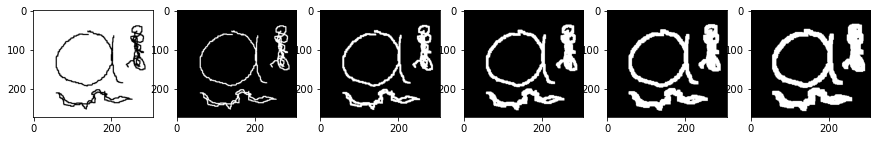

In [143]:
plt.figure(figsize=(15,15))
plt.subplot(1,6,1),plt.imshow(img_1)
plt.subplot(1,6,2),plt.imshow(img_2,cmap='gray')
plt.subplot(1,6,3),plt.imshow(img_3,cmap='gray')
plt.subplot(1,6,4),plt.imshow(img_4,cmap='gray')
plt.subplot(1,6,5),plt.imshow(img_5,cmap='gray')
plt.subplot(1,6,6),plt.imshow(img_6,cmap='gray')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

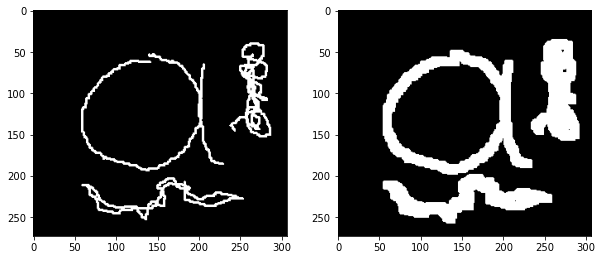

In [144]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(img_2,cmap='gray')
plt.subplot(1,2,2),plt.imshow(img_6,cmap='gray')
plt.show